In [1]:
import pdfplumber
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd  

fpath = '/home/yutong.zhao/Documents/2021_public_sector_comp_report.pdf'

header_list = ['Last', 'First', 'Position']

In [2]:
def get_row_data(info_str, ind_array):
    if info_str.isspace() or (info_str is None):
        return None
    ind = info_str.find('$')
    amount = info_str[ind+1:-1]
    last_name = clean_str(info_str[ind_array[0]:ind_array[1]])
    first_name = clean_str(info_str[ind_array[1]:ind_array[2]])
    position = clean_str(info_str[ind_array[2]:ind])
    compensation = float(amount.replace(" ", "").replace(',', ''))
    data_row = [last_name, first_name, position, compensation]
    # print(data_row)
    return data_row

def process_header(title_str, header_list):
    ind_array = []
    for item in header_list:
        ind = title_str.find(item)
        ind_array.append(ind)
    # print(ind_array)

    return ind_array

def clean_str(mystring):
    cleanstr = ' '.join(mystring.split())
    return cleanstr.rstrip()

In [3]:
def loop_over_lanes(pagestr):
    lines = pagestr.splitlines()

    trigger = False
    data_array = []
    for lanes in lines:
        my_str = lanes.lstrip() + ' '     # remove leading spaces

        if ('Page' in my_str) and ('of' in my_str):
            # reach to the end of the page, no need to record.
            trigger = False
        
        if trigger:
            row = get_row_data(my_str, ind_array)
            if row is not None:
                data_array.append(row)
        
        if 'Last Name' in my_str:
            ind_array = process_header(my_str, header_list)
            trigger = True
            
    return data_array


In [4]:
data_whole = []

with pdfplumber.open(fpath) as pdf:
    for n in np.arange(4,50):
        # print(n)
        pagestr = pdf.pages[n].extract_text(layout=True, x_tolerance=1,x_density=3)
        sa = loop_over_lanes(pagestr)
        data_whole.extend(sa)


In [44]:
def count_unique(data, filter):
    my_count = []
    position_types = data[filter].unique()
    for position in position_types:
        n_empolyee = len(data.loc[data[filter] == position])
        my_count.append([position, n_empolyee])
    sorted_list = sorted(my_count, key = lambda x: x[1], reverse = True)
    return sorted_list

def analysis_with_plot(data, position):
    data_analysis = data.loc[data['Position'] == position]
    salary_array = data_analysis['Compensation']
    # display(salary_array)
    bins = np.arange(75000,600000,10000)
    plt.hist(salary_array, bins=bins)
    plt.title(f"Univerisity of Manitoba Compensation Statistics ({position})")
    plt.xlabel('Yearly income (CAD)')
    plt.ylabel(' Counts (number of people)')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.8, 0.8, "textstr", fontsize=14, verticalalignment='top', bbox=props)
    # plt.yscale('log')
    plt.show() 


data = pd.DataFrame(data_whole, columns =['First Name', 'Last Name', 'Position','Compensation']) 
display(data[1:10])

position_type = data['Position'].unique()
position_n = count_unique(data, 'Position')
print(position_n[0:20])

,First Name,Last Name,Position,Compensation
1,ACAR,ELIF FIDAN,ASSOCIATE PROFESSOR,82954.32
2,ACHTEMICHUK,MONICA DAWN,"DIRECTOR, MEDICAL REHAB PROGRAM",108392.60
3,ADAMKO,HEIDI,"DIR, CHANGE MGMT / PROJECT SERV",121816.07
4,ADAMS,CHRISTOPHER JOHN,RECTOR - ST. PAUL'S COLLEGE,172502.45
5,ADAMS,JEFFREY,"REGISTRAR & EXEC. DIRECTOR, ENROLMENT SERVICES",168189.62
6,ADAMS STUBBS,CHRISTINE MARGARET,SENIOR ACADEMIC ADVISOR,77376.31
7,ADHIKARI MUDIYANSELAGE,NANDIKA PRIYANTHA BANDARA,ASSISTANT PROFESSOR,109968.65
8,AFIFI,TRACIE,PROFESSOR,156981.26
9,AGER,MARK,PROJECT MANAGER LEVEL 2,100893.67


[['PROFESSOR', 479], ['ASSOCIATE PROFESSOR', 358], ['ASSISTANT PROFESSOR', 287], ['INSTRUCTOR II', 88], ['SENIOR INSTRUCTOR', 63], ['INSTRUCTOR I', 29], ['ASSOCIATE LIBRARIAN', 24], ['RESEARCH ASSOCIATE', 21], ['INFORMATION TECHNOLOGIST', 18], ['DIRECTOR', 17], ['SENIOR SCHOLAR', 10], ['SYSTEMS ANALYST', 7], ['BUSINESS MANAGER', 7], ['PROJECT MANAGER LEVEL 2', 6], ['DATA ANALYST', 6], ['LIBRARIAN', 6], ['ASSISTANT LIBRARIAN', 6], ['LEGAL COUNSEL', 6], ['INFORMATION TECHNOLOGIST 4', 5], ['SYSTEMS ADMINISTRATOR', 5]]


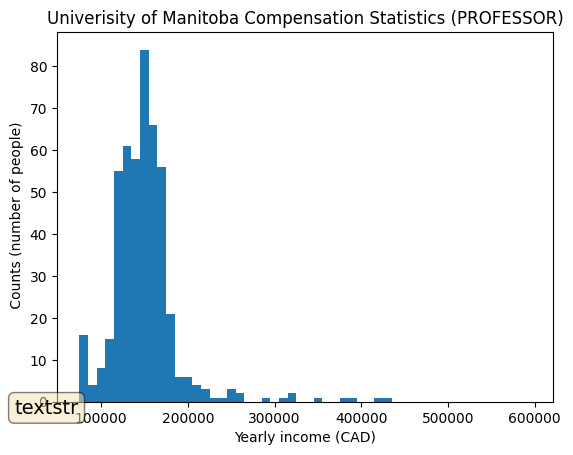

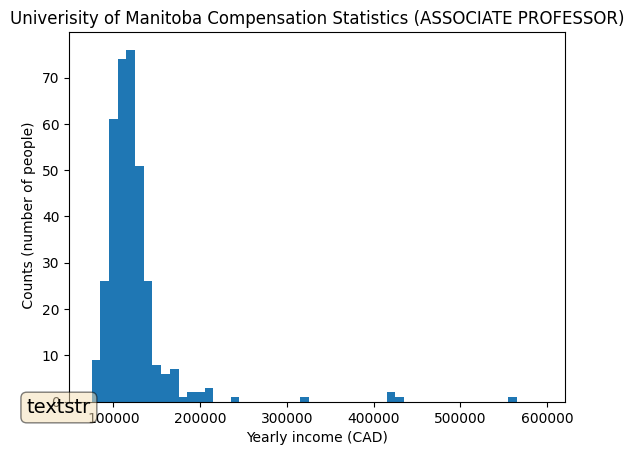

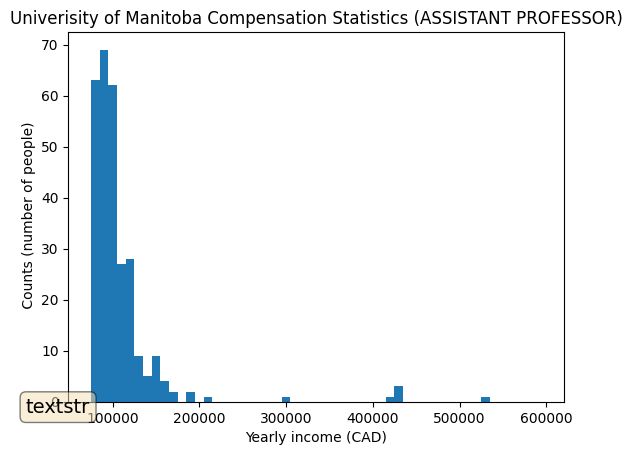

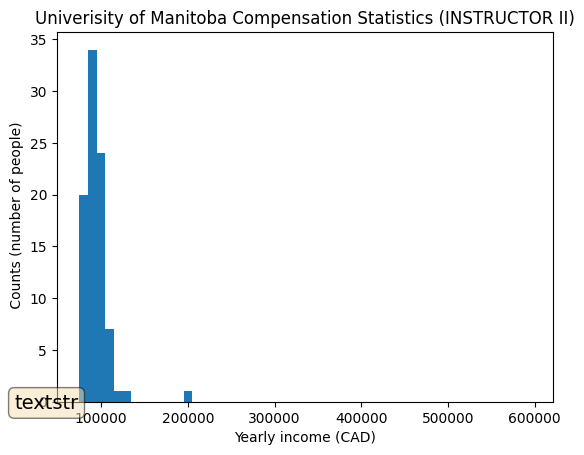

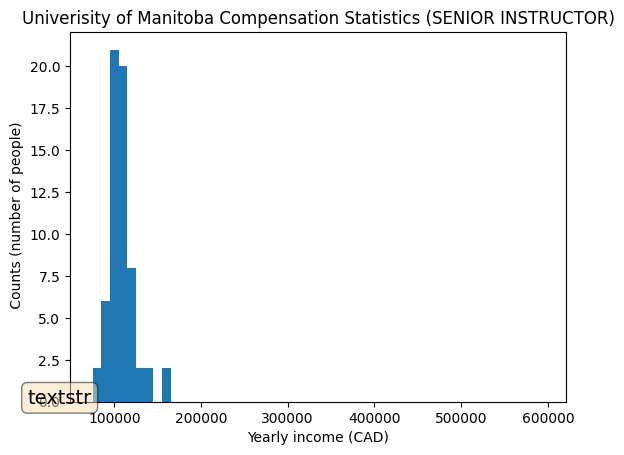

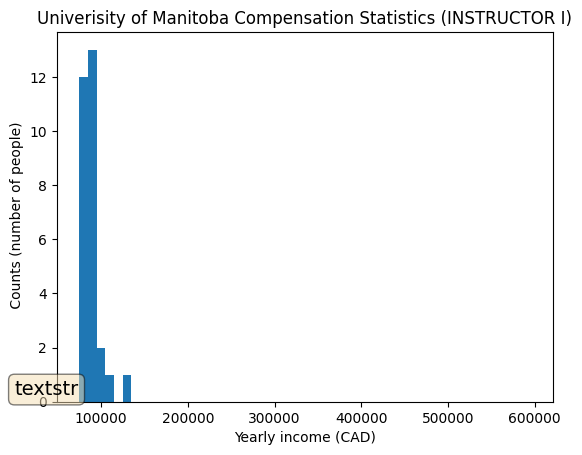

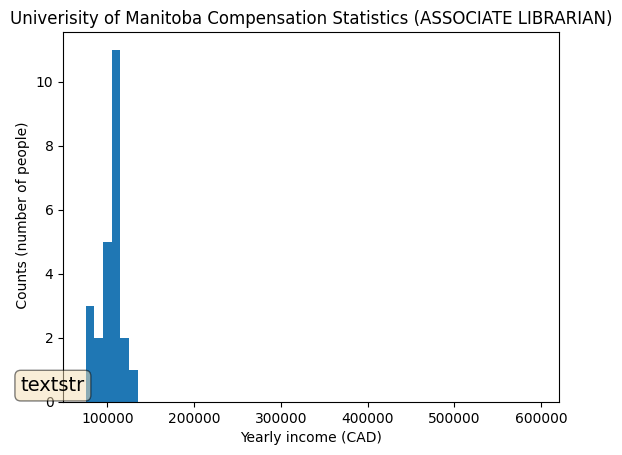

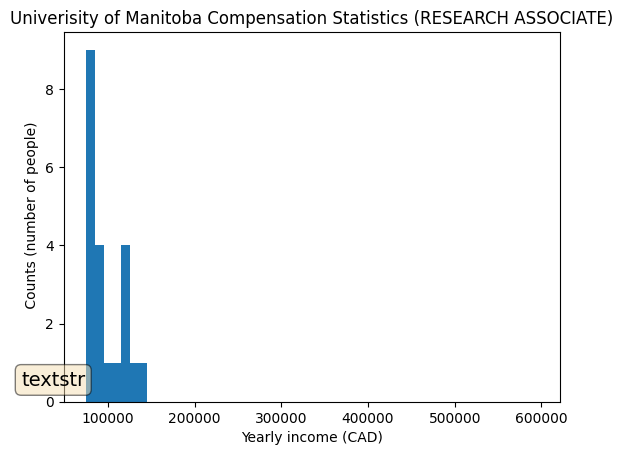

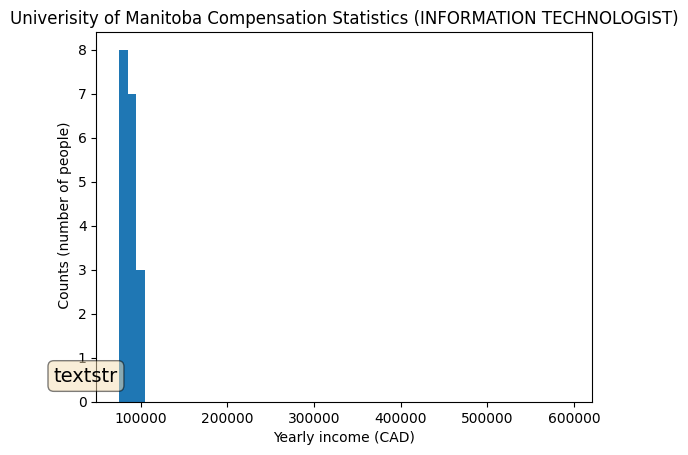

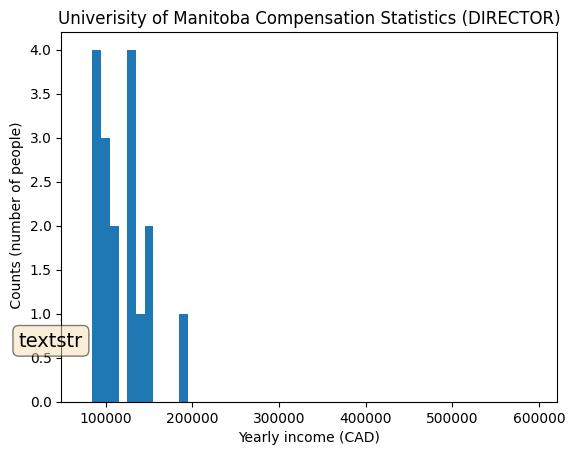

In [45]:
for item in position_n:
    if item[1]>10:
        pos = item[0]
        analysis_with_plot(data, pos)


In [8]:
print('max = ', max(salary_array_whole))
print('min = ', min(salary_array_whole))
print('mean = ', np.mean(salary_array_whole))
print('median = ', np.median(salary_array_whole))
counts = np.bincount(salary_array_whole)
print('mode = ', np.argmax(counts))


max =  564848.03
min =  75015.42
mean =  118990.62459537573
median =  108311.555
mode =  91139


In [42]:
def ispinyin(string):
    pinyinku = pinyinLib()
    string = string.lower()
    max_len = 6
    stringlen = len(string)
    result = []
    while True:
        matched = 0
        matched_word = ''
        if stringlen < max_len:
            max_len = stringlen                
        for i in range(max_len, 0, -1):
            s = string[(stringlen-i):stringlen]
            if s in pinyinku:
                matched_word = s
                matched = i
                break
        if len(matched_word) == 0:
            break
        else:
            result.append(s)
            string = string[:(stringlen-matched)]
            stringlen = len(string)
            if stringlen == 0:
                break
    return result


def pinyinLib():
    shengmu_table = ['b','p', 'm', 'f', 'd', 't', 'n', 'l',
                     'g','k','h','j','q','x','zh', 'ch', 'sh',
                     'r', 'z','c','s','y','w']
    yunmu_table = ['a','o','e','i','u','v','ai','ei','ui','ao','ou','iu','ie',
                   've', 'er','an','en','in','un','vn', 'ang','eng','ing', 'ong',
                   'ia','ua','uo','uai','uei','iao']
    yunmu_single = ['a','e','ai','ei','ao','ou','er','an','en', 'ang']
    pinyinku = []
    for shengmu in shengmu_table:
        for yunmu in yunmu_table:
            pinyinku.append(shengmu+yunmu)
    for yunmu in yunmu_single:
        pinyinku.append(yunmu)
    return pinyinku


In [43]:
import numpy as np
ispinyin('woaibeijingtiananmen')

['men', 'nan', 'tia', 'jing', 'bei', 'ai', 'wo']